In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product d.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product D,Iron Preparation,January,2019,96684,371027,879515,1
2019-02-01,Product D,Iron Preparation,February,2019,99187,380632,902285,2
2019-03-01,Product D,Iron Preparation,March,2019,113711,436369,1034407,3
2019-04-01,Product D,Iron Preparation,April,2019,103982,399033,945904,4
2019-05-01,Product D,Iron Preparation,May,2019,101826,390760,926291,5
2019-06-01,Product D,Iron Preparation,June,2019,106736,409602,970956,6
2019-07-01,Product D,Iron Preparation,July,2019,91567,351390,832967,7
2019-08-01,Product D,Iron Preparation,August,2019,96918,371925,881644,8
2019-09-01,Product D,Iron Preparation,September,2019,89551,343654,814628,9


In [4]:
sales_d= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_d.shape

(60, 3)

In [6]:
sales_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_d['Sales'].sum())
print('Total Market Size:',sales_d['Market Size'].sum())
print('Total Marketing Expense:', sales_d['Marketing Expense'].sum())

Total Sales: 7173488
Total Market Size: 22698270
Total Marketing Expense: 20113818


Text(0.5, 1.0, 'Product D')

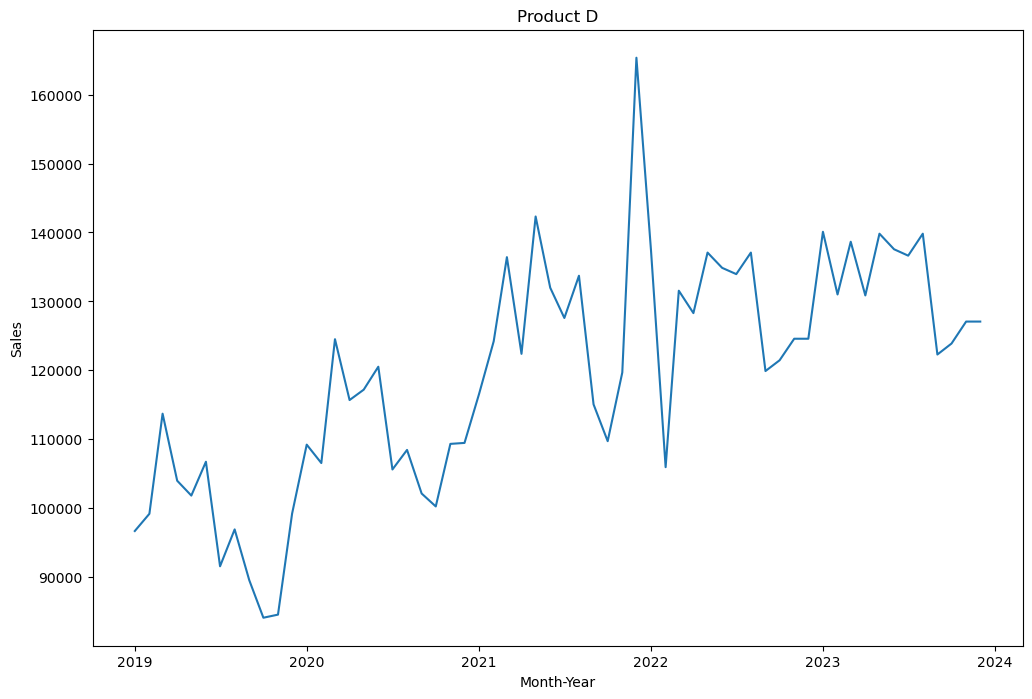

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_d['Sales'])
plt.title('Product D')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_d['Sales'])

ADF Statistics: -2.3249460487083105
p- value: 0.16404854202961083
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_d_diff= sales_d['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product D - First Difference')

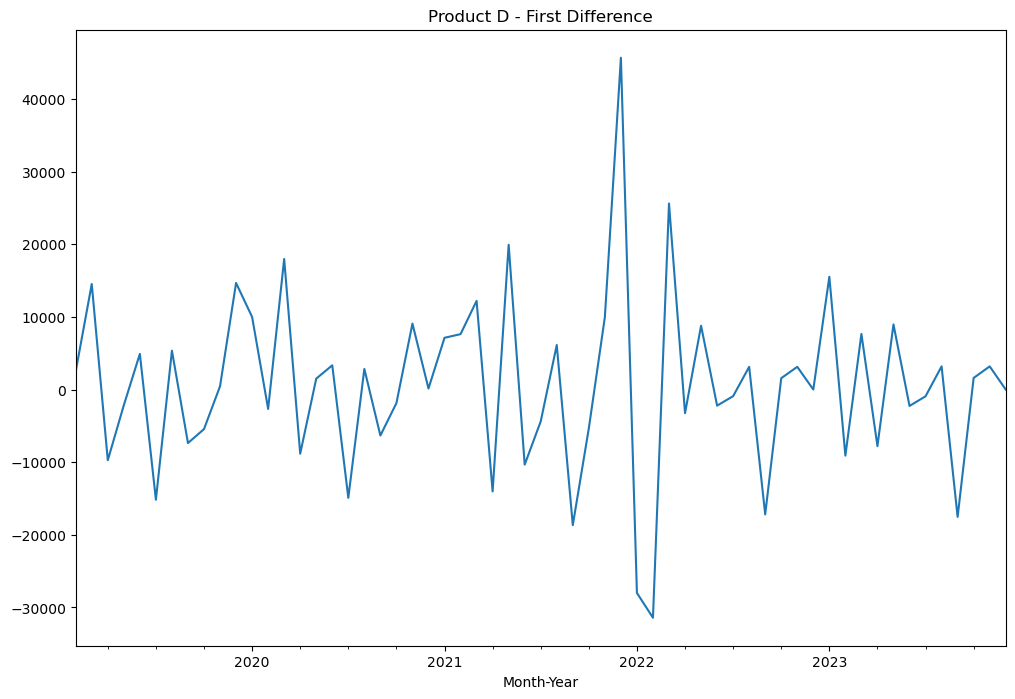

In [13]:
sales_d_diff.plot(figsize=(12,8))
plt.title('Product D - First Difference')

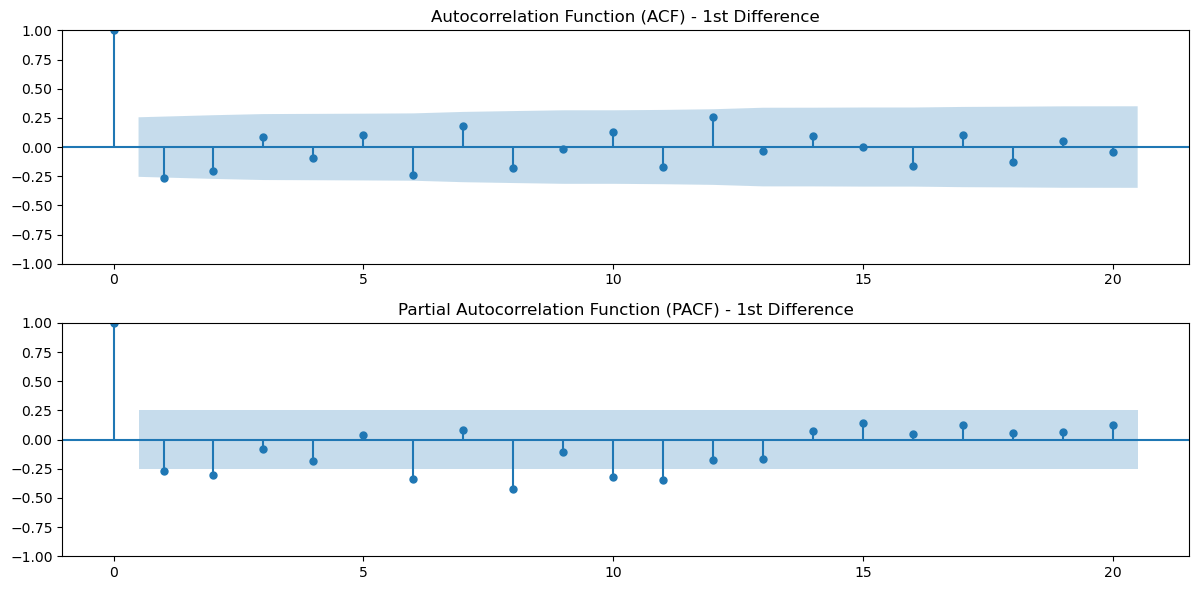

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_d_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_d_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_d_diff)

ADF Statistics: -4.6011480666771325
p- value: 0.00012854172822943823
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_d[:54]
test=sales_d[54:]

In [17]:
print(len(train), len(test))

54 6


In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(2):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_d)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic          mae           mse         rmse
1   0  1  1148.317361  1156.198529  4404.976125  2.833671e+07  5323.223204
3   1  1  1149.284468  1159.135928  4823.371995  3.334552e+07  5774.557806
4   2  0  1150.970217  1160.821677  4995.383916  3.560492e+07  5966.986063
5   2  1  1150.982088  1162.803839  4643.804078  3.130973e+07  5595.510238
6   3  0  1152.128700  1163.950451  4753.160869  3.254606e+07  5704.915046
2   1  0  1152.623956  1160.505124  6417.265792  5.745512e+07  7579.915610
7   3  1  1152.805912  1166.597956  4677.034178  3.167115e+07  5627.712811
8   4  0  1153.513090  1167.305133  4606.978891  2.979900e+07  5458.846356
9   4  1  1154.789659  1170.551994  4681.662257  3.163903e+07  5624.857804
10  5  0  1155.454276  1171.216611  4609.571443  2.982778e+07  5461.481168
11  5  1  1156.782054  1174.514681  4686.621498  3.174599e+07  5634.357626
0   0  0  1312.183777  1318.094653  6777.846185  6.393891e+07  7996.180841


In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -570.159
Date:                Thu, 09 May 2024   AIC                           1148.317
Time:                        16:56:52   BIC                           1156.199
Sample:                    01-01-2019   HQIC                          1151.348
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1709      0.030      5.650      0.000       0.112       0.230
Marketing Expense    -0.0039      0.019     -0.209      0.835      -0.040       0.032
ma.L1                -0.

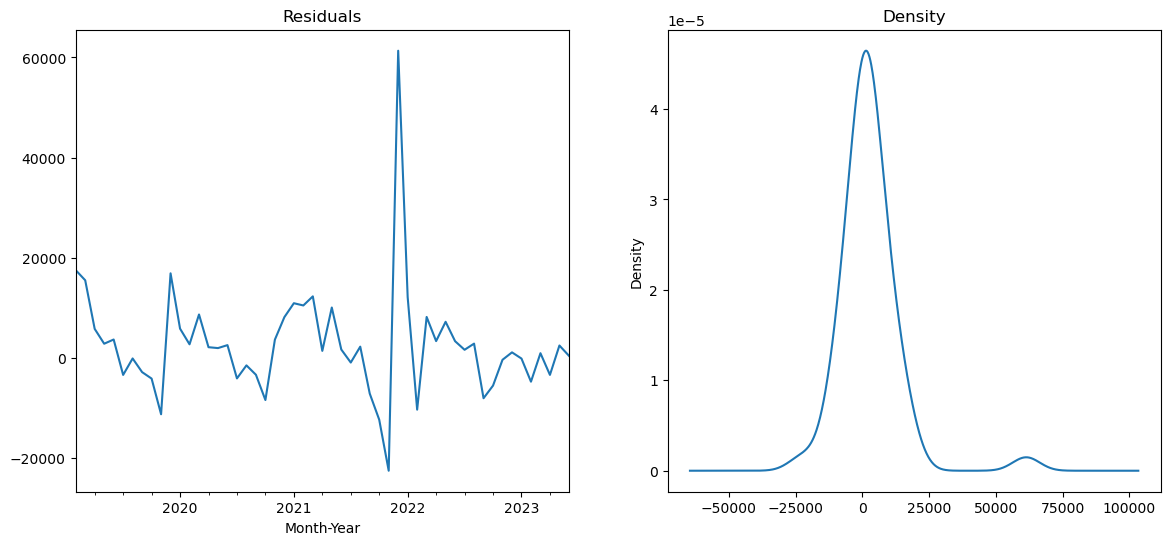

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

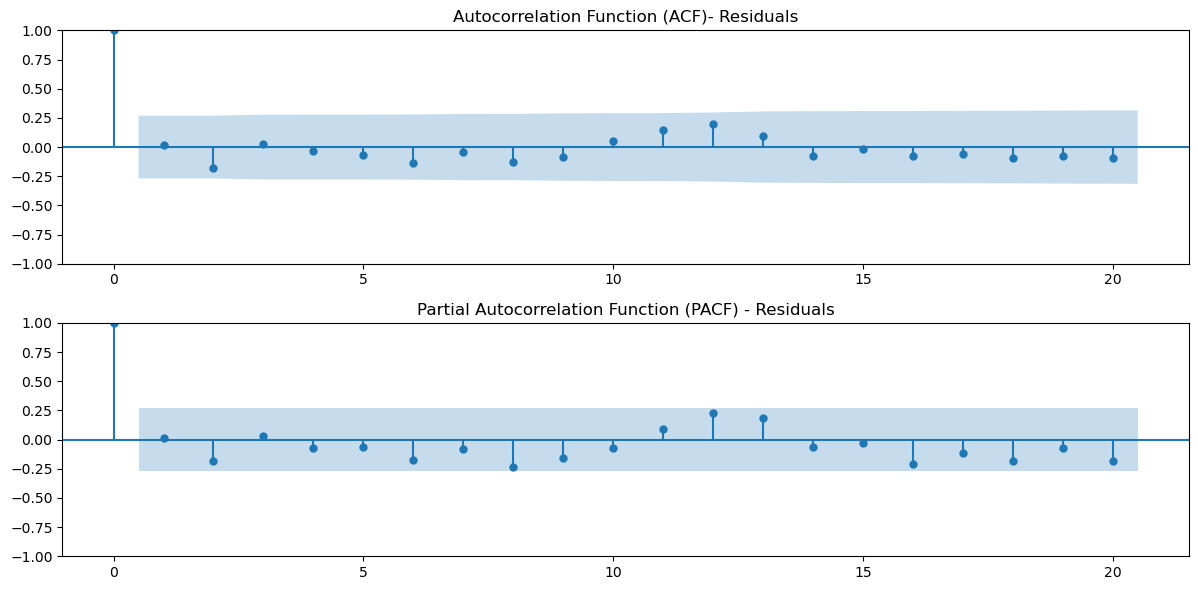

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

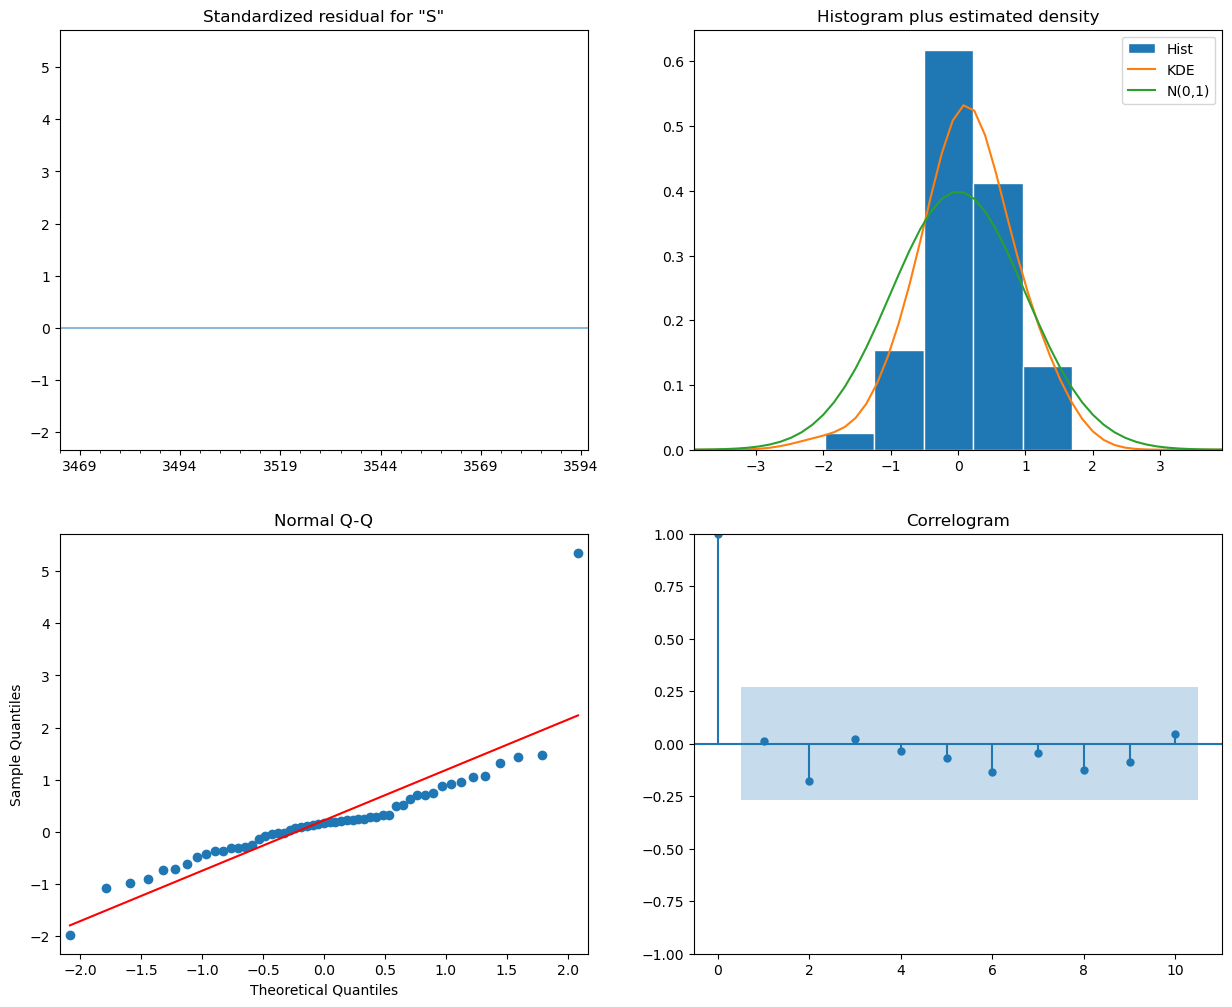

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_d)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_d['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

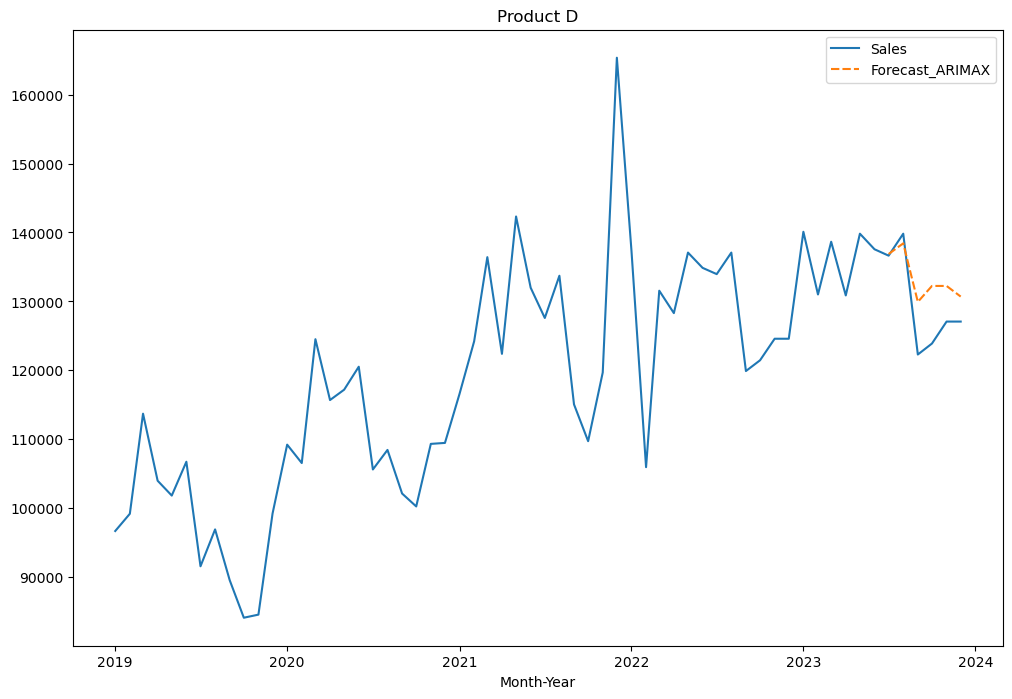

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_ARIMAX']])
plt.title('Product D')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 4404.976124857184
MAPE - ARIMAX: 0.03514822546522194
MSE - ARIMAX: 28336705.282762825
RMSE - ARIMAX: 5323.2232042967


# SARIMA

In [33]:
import statsmodels.api as sm

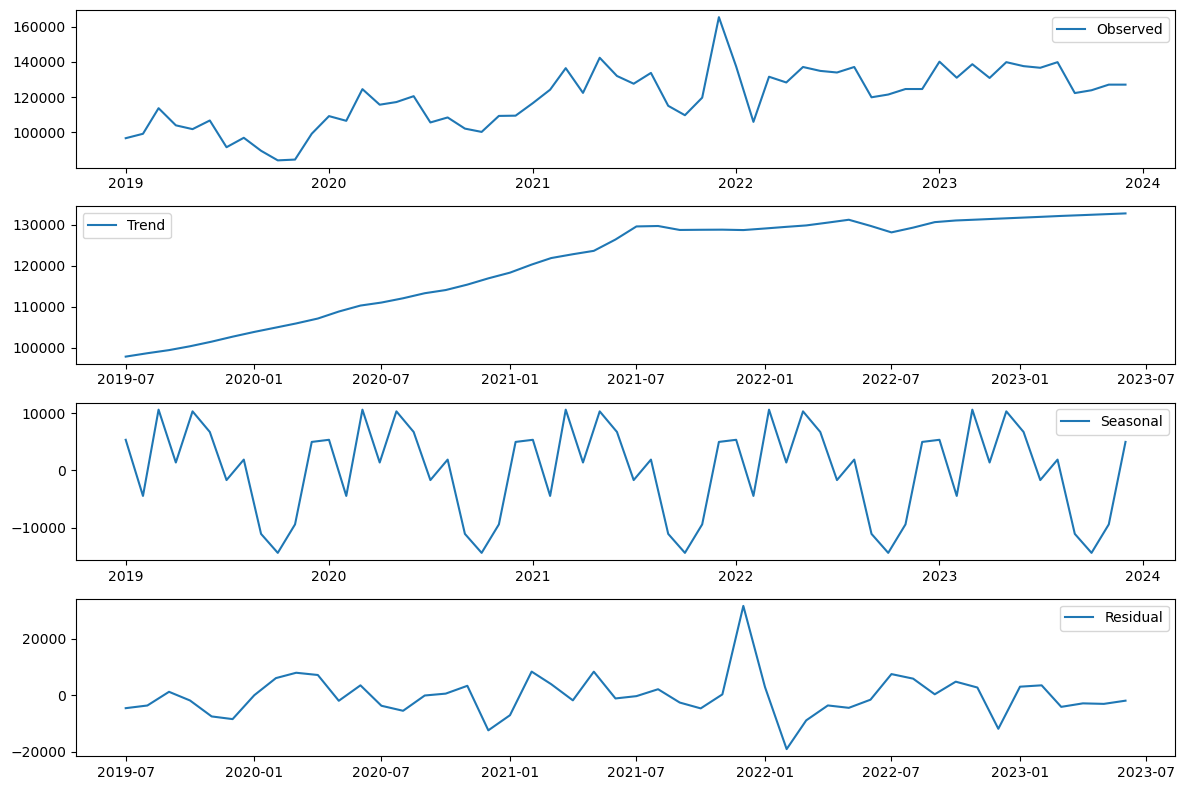

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_d['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

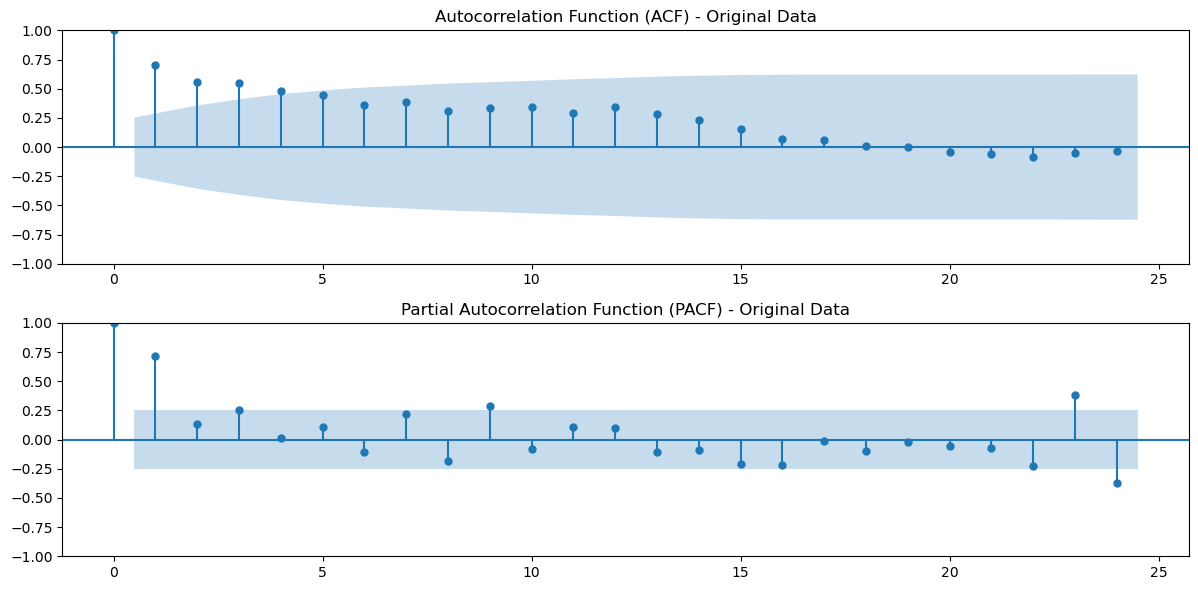

In [35]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_d['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_d['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [36]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(4):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [37]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic          mae           mse
12  3  0  1141.896595  1155.688638  6444.490627  7.730152e+07
2   0  2  1142.309887  1154.131639  5356.296238  6.002028e+07
6   1  2  1142.841961  1156.634005  5441.860361  5.517185e+07
9   2  1  1143.475063  1157.267106  6156.399871  8.990694e+07
3   0  3  1143.487130  1157.279173  5001.220558  4.473836e+07
16  4  0  1143.804434  1159.566769  6299.378361  7.242153e+07
13  3  1  1143.806852  1159.569187  6334.973221  7.368180e+07
8   2  0  1144.205072  1156.026823  5875.097770  9.340655e+07
7   1  3  1144.208121  1159.970456  6049.530969  7.181839e+07
10  2  2  1144.398034  1160.160370  6022.758816  7.289281e+07
14  3  2  1145.804657  1163.537285  6310.030343  7.276636e+07
17  4  1  1145.805203  1163.537830  6317.095557  7.307334e+07
11  2  3  1146.229811  1163.962438  6170.636390  7.636041e+07
18  4  2  1147.804454  1167.507373  6300.444895  7.246378e+07
15  3  3  1147.805932  1167.508851  6317.646863  7.316719e+07
4   1  0

In [41]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(3,0,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   54
Model:             SARIMAX(0, 1, 1)x(3, 0, [], 12)   Log Likelihood                -563.948
Date:                             Thu, 09 May 2024   AIC                           1141.897
Time:                                     16:58:30   BIC                           1155.689
Sample:                                 01-01-2019   HQIC                          1147.200
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1353      0.045      2.988      0.003       0.047       0.224
Market

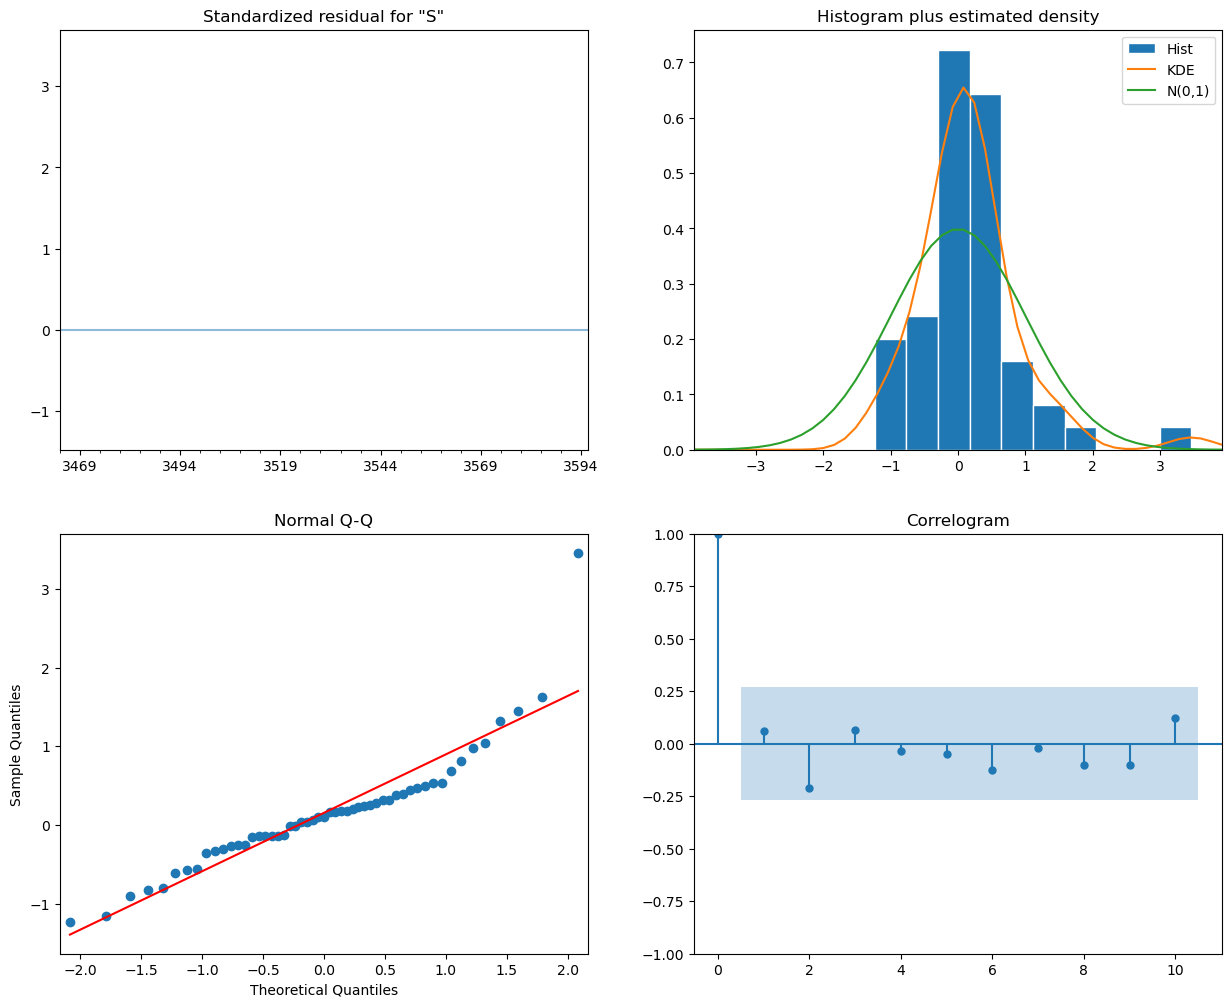

In [42]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [43]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [44]:
sales_d['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product D')

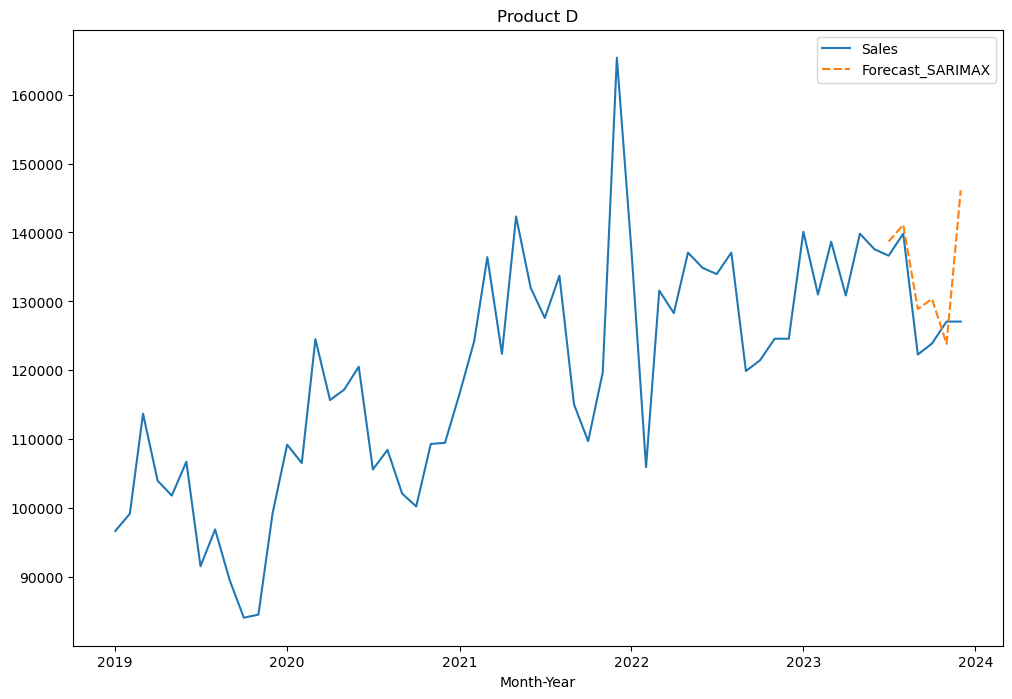

In [45]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_SARIMAX']])
plt.title('Product D')

In [46]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 6444.491
MAPE - SARIMAX: 0.051
MSE - SARIMAX: 77301520.542
RMSE - SARIMAX: 8792.128


# AUTO-ARIMA

In [47]:
import pmdarima as pm

In [48]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=4 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1156.894, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1156.779, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1154.703, Time=0.17 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=1153.315, Time=0.63 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=1154.295, Time=3.61 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1156.155, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1157.576, Time=0.11 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1151.894, Time=0.46 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=1153.888, Time=1.22 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=1155.849, Time=6.02 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1155.927, Time=0.14 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1153.113, Time=0.30 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1153.886, Time=0.53 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=1155.852, Time=3.36 sec
 ARIMA(0,1,0)(3,0,0)[12] intercept   : AIC=1154.242, Time=0.50

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [49]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -567.870
Date:                                 Thu, 09 May 2024   AIC                           1149.741
Time:                                         16:59:58   BIC                           1163.533
Sample:                                     01-01-2019   HQIC                          1155.045
                                          - 06-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1198.7392   1324.381      0.905      0.365   -1397.000    3794.478
ar.L1          0.5341      0.201      2.655      0.008       0.140       0.928
ma.L1         -0.8416      0.184     -4.565      0.000      -1.203      -0.480
ar.S.L12      -0.7466      0.671     -1.113      0.266      -2.062       0.568
ma.S.L12       1.0321      0.790      1.307      0.191      -0.516       2.580
ma.S.L24       0.4667      0.228      2.043      0.041       0.019       0.915
sigma2      1.477e+08      0.008   1.76e+10      0.000    1.48e+08    1.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.69   Prob(JB):                         0.03
Heteroskedasticity (H):               0.74   Skew:                             0.42
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.47e+26. Standard errors may be unstable.
"""

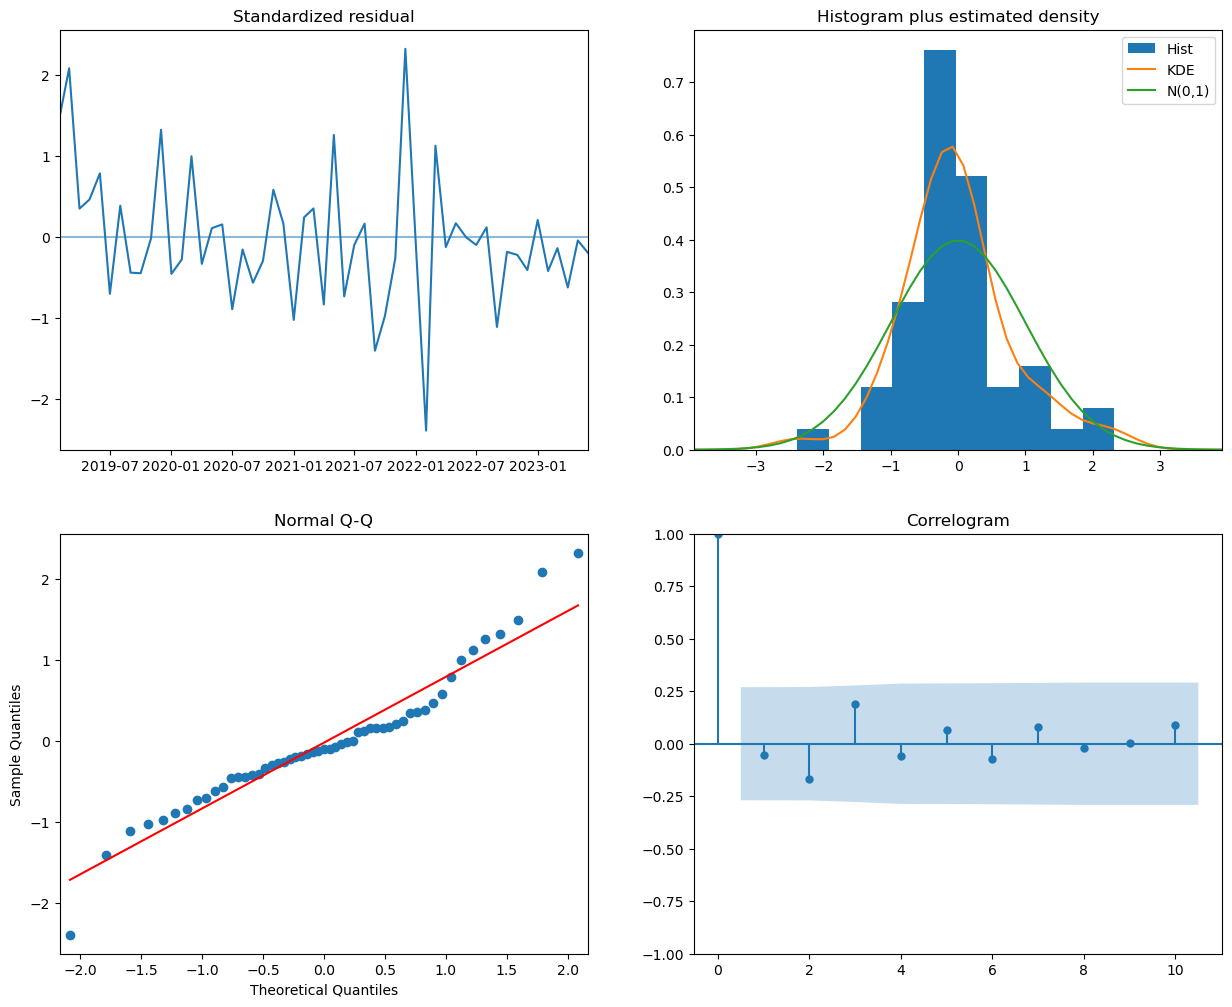

In [50]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [51]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_d['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product D')

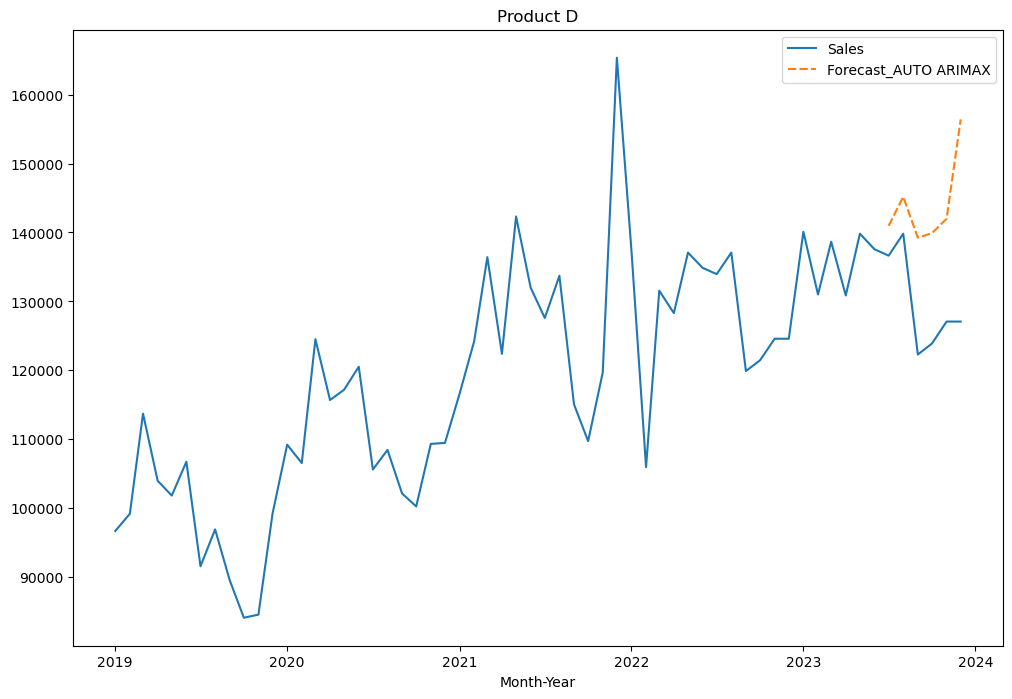

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product D')

In [53]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 14483.883497107056
MAPE - AUTO ARIMAX: 0.11435190241712241
MSE - AUTO ARIMAX: 279061071.67597157
RMSE - AUTO ARIMAX: 16705.121121260137


In [54]:
sales_d.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,140104,399507,98343,NaN,NaN,NaN
2023-02-01,131006,373564,91957,NaN,NaN,NaN
2023-03-01,138656,395378,97326,NaN,NaN,NaN
2023-04-01,130866,373165,91858,NaN,NaN,NaN
2023-05-01,139824,398708,98146,NaN,NaN,NaN
2023-06-01,137565,392267,96561,NaN,NaN,NaN
2023-07-01,136637,389621,95909,136876.706136,138681.683717,140967.876396
2023-08-01,139824,398708,98146,138420.571943,141113.301312,145176.252583
2023-09-01,122293,348719,85841,129927.521876,128896.599694,139245.776511


In [55]:
sales_d.mean()

Sales                   119558.133333
Market Size             378304.500000
Marketing Expense       335230.300000
Forecast_ARIMAX         133402.000106
Forecast_SARIMAX        134834.662344
Forecast_AUTO ARIMAX    143948.716830
dtype: float64

In [56]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,4404.976125,0.035148,2.833671e+07,5323.223204
AUTO ARIMAX,14483.883497,0.114352,2.790611e+08,16705.121121
SEASONAL ARIMAX,6444.490627,0.050930,7.730152e+07,8792.128328


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1156.894, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1156.779, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1154.703, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1156.155, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1157.576, Time=0.08 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1151.894, Time=0.40 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1155.927, Time=0.14 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1153.113, Time=0.30 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1153.886, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1157.057, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1156.999, Time=0.10 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1154.166, Time=0.24 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1156.400, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1158.004, Time=0.15 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1149.803, Time=0.42

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -567.870
Date:                                 Wed, 08 May 2024   AIC                           1149.741
Time:                                         19:11:04   BIC                           1163.533
Sample:                                     01-01-2019   HQIC                          1155.045
                                          - 06-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1198.7392   1324.381      0.905      0.365   -1397.000    3794.478
ar.L1          0.5341      0.201      2.655      0.008       0.140       0.928
ma.L1         -0.8416      0.184     -4.565      0.000      -1.203      -0.480
ar.S.L12      -0.7466      0.671     -1.113      0.266      -2.062       0.568
ma.S.L12       1.0321      0.790      1.307      0.191      -0.516       2.580
ma.S.L24       0.4667      0.228      2.043      0.041       0.019       0.915
sigma2      1.477e+08      0.008   1.76e+10      0.000    1.48e+08    1.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.69   Prob(JB):                         0.03
Heteroskedasticity (H):               0.74   Skew:                             0.42
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.47e+26. Standard errors may be unstable.
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_d['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product D')

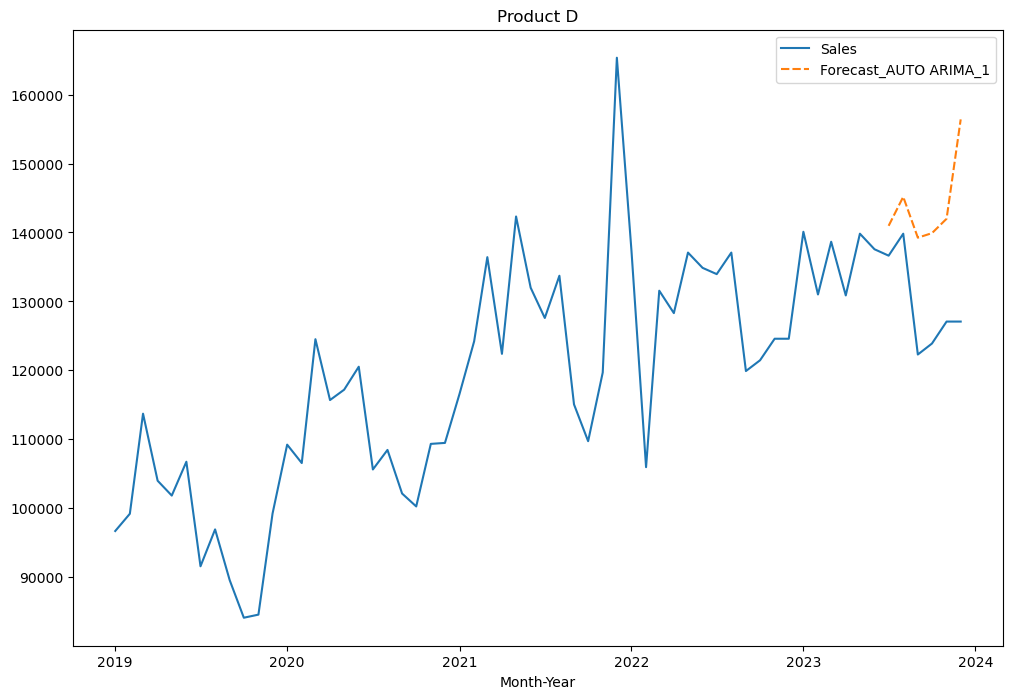

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product D')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 14483.883497107056
MAPE - AUTO ARIMA: 0.11435190241712241
MSE - AUTO ARIMA: 279061071.67597157
RMSE - AUTO ARIMA: 16705.121121260137
